<a href="https://colab.research.google.com/github/hannesstuehrenberg/Probabilistic-Machine-Learning_lecture-PROJECTS/blob/08-1SHXXXX_football_analytics/projects/08-1SHXXXX_football_analytics/notebooks/05_model_training_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 2.1 MB/s eta 0:00:00


In [3]:
#Import necessary libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import VerticalPitch
from mplsoccer import Sbopen
from tqdm import tqdm
import gdown

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Initialize parser
parser = Sbopen()


5. Model Training and Evaluation

* Training process
* Model evaluation (metrics, plots, performance)
* Cross-validation or uncertainty quantification


In [4]:
file_id = '1woI9VNEp7V1MR6nIxReXdbNhOWE_9zPz'
url = f'https://drive.google.com/uc?id={file_id}'

shots_master_df = pd.read_csv(url)

print(shots_master_df.shape)
shots_master_df.info()


(87111, 64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87111 entries, 0 to 87110
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            87111 non-null  object 
 1   index                         87111 non-null  int64  
 2   match_id                      87111 non-null  int64  
 3   period                        87111 non-null  int64  
 4   timestamp                     87111 non-null  object 
 5   team_id                       87111 non-null  int64  
 6   team_name                     87111 non-null  object 
 7   player_id                     87111 non-null  float64
 8   player_name                   87111 non-null  object 
 9   position_id                   87111 non-null  float64
 10  position_name                 87111 non-null  object 
 11  x                             87111 non-null  float64
 12  y                             87111 non-null  fl

In [5]:
print(shots_master_df.keys())

Index(['id', 'index', 'match_id', 'period', 'timestamp', 'team_id',
       'team_name', 'player_id', 'player_name', 'position_id', 'position_name',
       'x', 'y', 'end_x', 'end_y', 'end_z', 'body_part_id', 'body_part_name',
       'sub_type_id', 'technique_id', 'shot_statsbomb_xg', 'shot_key_pass_id',
       'under_pressure', 'off_camera', 'out', 'aerial_won', 'shot_first_time',
       'shot_one_on_one', 'shot_deflected', 'shot_open_goal', 'shot_redirect',
       'shot_follows_dribble', 'outcome_id', 'outcome_name', 'minute',
       'second', 'duration', 'half_start_late_video_start',
       'half_end_early_video_end', 'pass_backheel', 'possession',
       'possession_team_id', 'possession_team_name', 'play_pattern_id',
       'play_pattern_name', 'distance_to_goal', 'angle_to_goal',
       'angle_to_goal_deg', 'opponents_in_way', 'teammates_in_way',
       'players_in_way', 'technique_name_Backheel',
       'technique_name_Diving Header', 'technique_name_Half Volley',
       'techni

In [6]:
print(
  # 'id',
  # 'index',
  # 'match_id',
  # 'period',
  # 'timestamp',
  # 'team_id',
  # 'team_name',
  # 'player_id',
  # 'player_name',
  # 'position_id',
  # 'position_name',
  'x',
  'y',
  # 'end_x',
  # 'end_y',
  # 'end_z',
  # 'body_part_id',
  # 'body_part_name',
  # 'sub_type_id',
  # 'technique_id',
  # 'shot_statsbomb_xg',
  # 'shot_key_pass_id',
  # 'under_pressure',
  # 'off_camera',
  # 'out',
  # 'aerial_won',
  # 'shot_first_time',
  # 'shot_one_on_one',
  # 'shot_deflected',
  # 'shot_open_goal',
  # 'shot_redirect',
  # 'shot_follows_dribble',
  # 'outcome_id',
  # 'outcome_name',
  # 'minute',
  # 'second',
  # 'duration',
  # 'half_start_late_video_start',
  # 'half_end_early_video_end',
  # 'pass_backheel',
  # 'possession',
  # 'possession_team_id',
  # 'possession_team_name',
  # 'play_pattern_id',
  # 'play_pattern_name',
  'distance_to_goal',
  'angle_to_goal',
  #'angle_to_goal_deg',
  'opponents_in_way',
  'teammates_in_way',
  # 'players_in_way',
  'technique_name_Backheel',
  'technique_name_Diving Header',
  'technique_name_Half Volley',
  'technique_name_Lob',
  'technique_name_Normal',
  'technique_name_Overhead Kick',
  'technique_name_Volley',
  'sub_type_name_Corner',
  'sub_type_name_Free Kick',
  'sub_type_name_Kick Off',
  'sub_type_name_Open Play',
  'sub_type_name_Penalty',
  'goal',
)

x y distance_to_goal angle_to_goal opponents_in_way teammates_in_way technique_name_Backheel technique_name_Diving Header technique_name_Half Volley technique_name_Lob technique_name_Normal technique_name_Overhead Kick technique_name_Volley sub_type_name_Corner sub_type_name_Free Kick sub_type_name_Kick Off sub_type_name_Open Play sub_type_name_Penalty goal


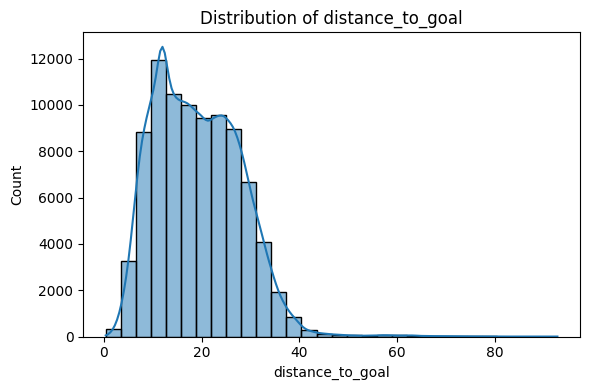

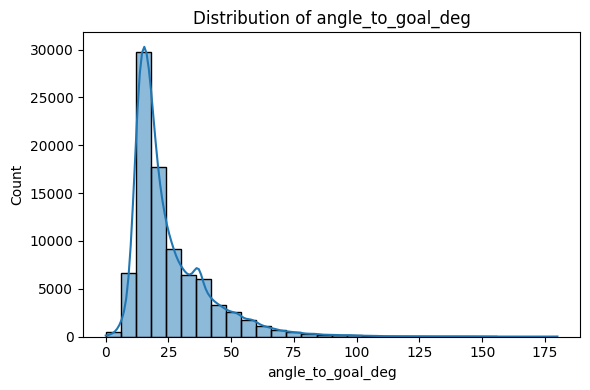

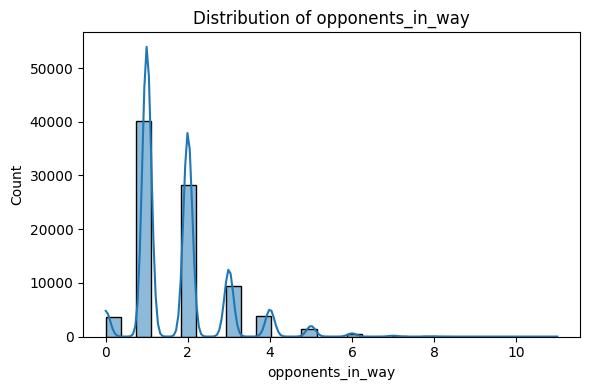

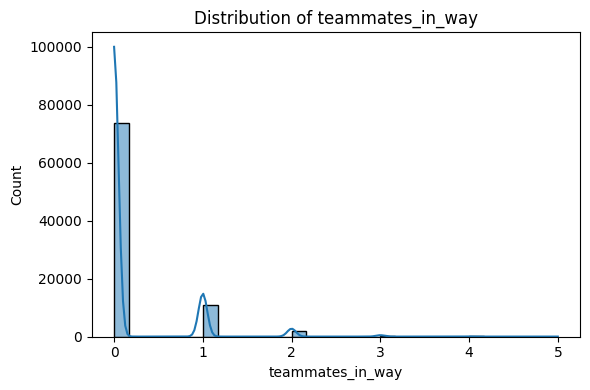

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = [
    'distance_to_goal', 'angle_to_goal_deg', 'opponents_in_way', 'teammates_in_way'
]

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(shots_master_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


KeyboardInterrupt: 

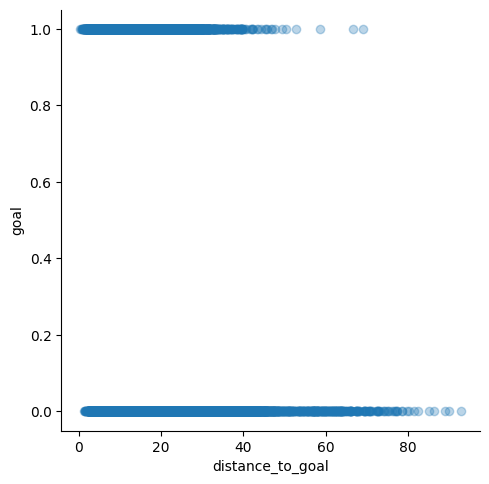

In [14]:
sns.lmplot(
    data=shots_master_df,
    x='distance_to_goal',
    y='goal',
    logistic=True,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title("Probability of Goal vs. Distance to Goal")
plt.ylabel("Probability of Goal")
plt.xlabel("Distance to Goal")
plt.show()


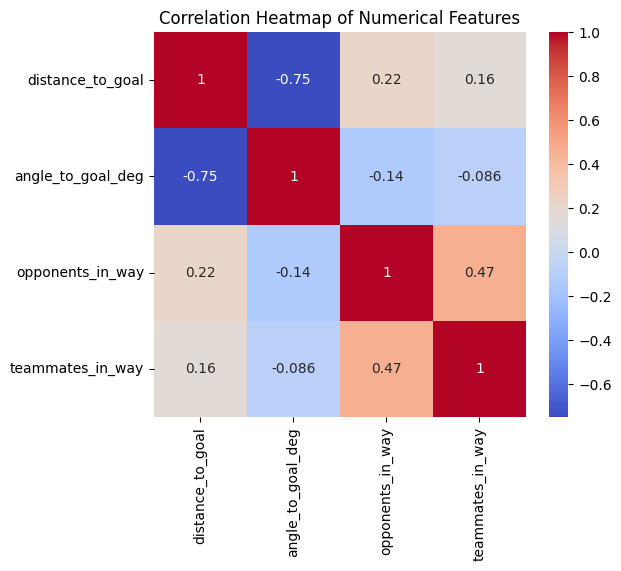

In [9]:
corr = shots_master_df[numerical_features].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [11]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Features auswählen:
numerical_features = [
    'distance_to_goal', 'angle_to_goal_deg', 'opponents_in_way', 'teammates_in_way'
]

X_num = shots_master_df[numerical_features]

# Hinzufügen einer Konstanten für Intercept (wird von statsmodels oft erwartet):
X_num_const = sm.add_constant(X_num)


In [12]:
import statsmodels.api as sm

vif_data = pd.DataFrame()
vif_data["Feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]

print(vif_data)


             Feature       VIF
0   distance_to_goal  3.169496
1  angle_to_goal_deg  1.964455
2   opponents_in_way  4.613695
3   teammates_in_way  1.454304


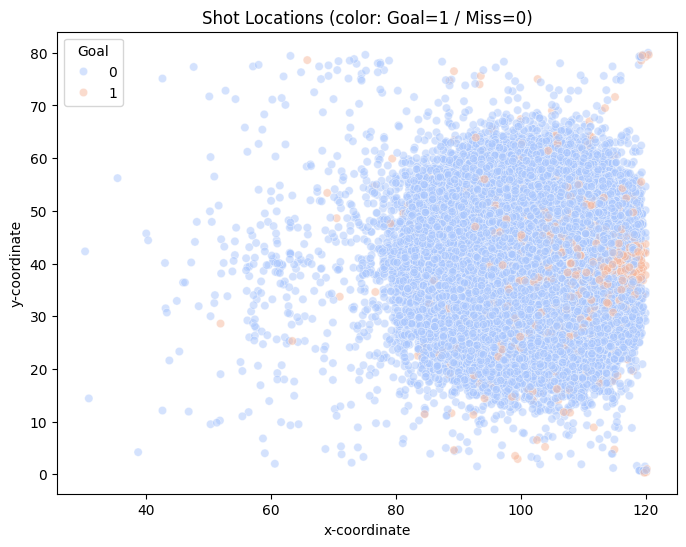

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=shots_master_df,
    x='x', y='y',
    hue='goal',
    palette='coolwarm',
    alpha=0.5
)
plt.title("Shot Locations (color: Goal=1 / Miss=0)")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.legend(title='Goal')
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=shots_master_df,
    x='technique_name',
    y='goal'
)
plt.title("Goal Probability by Shot Technique")
plt.xticks(rotation=45)
plt.ylabel("Probability of Goal")
plt.xlabel("Technique")
plt.tight_layout()
plt.show()


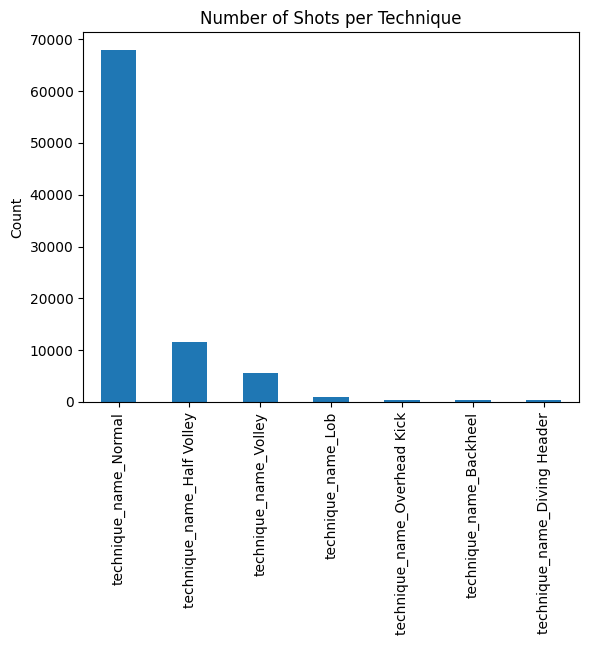

In [16]:
technique_cols = [col for col in shots_master_df.columns if col.startswith('technique_name_')]
shots_master_df[technique_cols].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Number of Shots per Technique")
plt.ylabel("Count")
plt.show()


In [18]:
numerical_features = [
    'distance_to_goal', 'angle_to_goal_deg', 'opponents_in_way', 'teammates_in_way'
    # + ggf. deine neuen Features wie 'distance_angle_interaction'
]

categorical_features = [
    col for col in shots_master_df.columns
    if col.startswith('technique_name_') or col.startswith('sub_type_name_')
]

X = shots_master_df[numerical_features + categorical_features]
y = shots_master_df['goal']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)
    ]
)


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs'))
])


In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['distance_to_goal',
                                                   'angle_to_goal_deg',
                                                   'opponents_in_way',
                                                   'teammates_in_way']),
                                                 ('cat', 'passthrough',
                                                  ['technique_name_Backheel',
                                                   'technique_name_Diving '
                                                   'Header',
                                                   'technique_name_Half Volley',
                                                   'technique_name_Lob',
                                                   'technique_name_Normal',
                                                   'technique_name_Overhead '
                                                   'Kick',
                                                   'technique_name_Volley',
                                                   'sub_type_name_Corner',
                                                   'sub_type_name_Free Kick',
                                                   'sub_type_name_Kick Off',
                                                   'sub_type_name_Open Play',
                                                   'sub_type_name_Penalty'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [23]:
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss

# Vorhersagen auf Testset:
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Metriken:
auc = roc_auc_score(y_test, y_pred_proba)
acc = accuracy_score(y_test, y_pred)
ll = log_loss(y_test, y_pred_proba)

print(f"AUC: {auc:.3f}")
print(f"Accuracy: {acc:.3f}")
print(f"Log-Loss: {ll:.3f}")


AUC: 0.790
Accuracy: 0.902
Log-Loss: 0.282


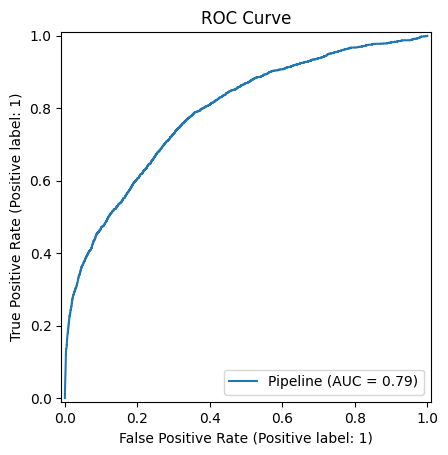

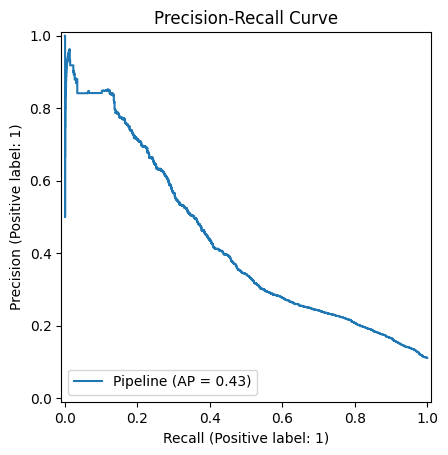

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title("ROC Curve")
plt.show()

PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()


In [27]:
# Add constant (if not already done)
X_train_const = sm.add_constant(X_train)

# Convert bool columns to int (0/1), leave other columns untouched
X_train_const = X_train_const.copy()
for col in X_train_const.columns:
    if X_train_const[col].dtype == bool:
        X_train_const[col] = X_train_const[col].astype(int)

# Double-check all columns are now numeric
assert all(np.issubdtype(dtype, np.number) for dtype in X_train_const.dtypes), "Non-numeric columns remain!"

# Fit logistic regression with statsmodels
logit_model = sm.Logit(y_train, X_train_const).fit()

# Extract log-likelihoods for McFadden's R²
llf_model = logit_model.llf
llf_null = logit_model.llnull
mcfadden_r2 = 1 - (llf_model / llf_null)

print(f"McFadden's R²: {mcfadden_r2:.3f}")


         Current function value: 0.285865
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


McFadden's R²: 0.180


In [26]:
print(X_train_const.dtypes)

const                           float64
distance_to_goal                float64
angle_to_goal_deg               float64
opponents_in_way                  int64
teammates_in_way                  int64
technique_name_Backheel            bool
technique_name_Diving Header       bool
technique_name_Half Volley         bool
technique_name_Lob                 bool
technique_name_Normal              bool
technique_name_Overhead Kick       bool
technique_name_Volley              bool
sub_type_name_Corner               bool
sub_type_name_Free Kick            bool
sub_type_name_Kick Off             bool
sub_type_name_Open Play            bool
sub_type_name_Penalty              bool
dtype: object


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline_balanced = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        solver='lbfgs',
        class_weight='balanced'
    ))
])


In [29]:
pipeline_balanced.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['distance_to_goal',
                                                   'angle_to_goal_deg',
                                                   'opponents_in_way',
                                                   'teammates_in_way']),
                                                 ('cat', 'passthrough',
                                                  ['technique_name_Backheel',
                                                   'technique_name_Diving '
                                                   'Header',
                                                   'technique_name_Half Volley',
                                                   'technique_name_Lob',
                                                   'technique_name_Normal',
                                                   'technique_name_Overhead '
                                                   'Kick',
                                                   'technique_name_Volley',
                                                   'sub_type_name_Corner',
                                                   'sub_type_name_Free Kick',
                                                   'sub_type_name_Kick Off',
                                                   'sub_type_name_Open Play',
                                                   'sub_type_name_Penalty'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [31]:
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss

y_pred = pipeline_balanced.predict(X_test)
y_pred_proba = pipeline_balanced.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
acc = accuracy_score(y_test, y_pred)
ll = log_loss(y_test, y_pred_proba)

print(f"AUC: {auc:.3f}")
print(f"Accuracy: {acc:.3f}")
print(f"Log-Loss: {ll:.3f}")


AUC: 0.789
Accuracy: 0.727
Log-Loss: 0.543


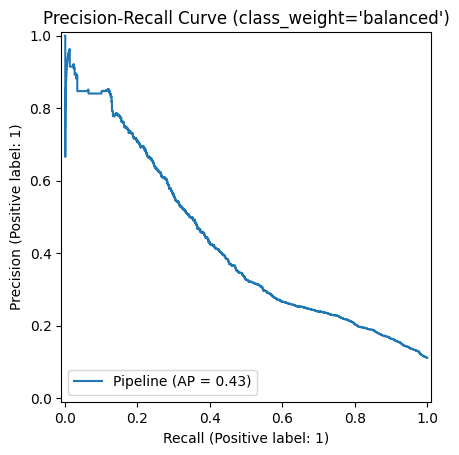

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(pipeline_balanced, X_test, y_test)
plt.title("Precision-Recall Curve (class_weight='balanced')")
plt.show()


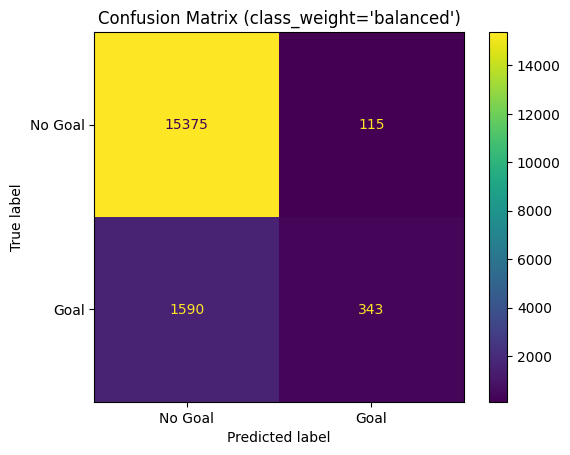

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=["No Goal", "Goal"]).plot(values_format='d')
plt.title("Confusion Matrix (class_weight='balanced')")
plt.show()

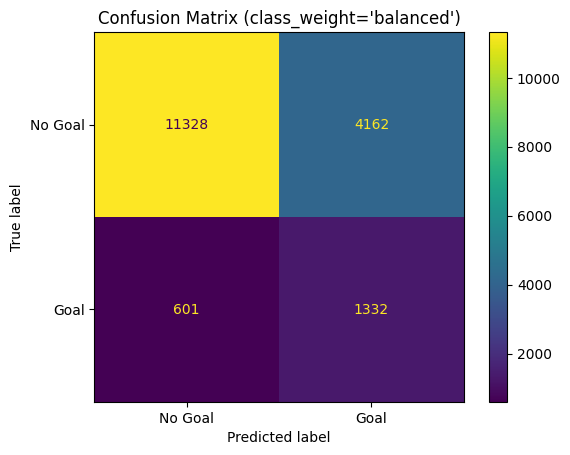

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = pipeline_balanced.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=["No Goal", "Goal"]).plot(values_format='d')
plt.title("Confusion Matrix (class_weight='balanced')")
plt.show()

Custom threshold 0.3: Precision=0.534, Recall=0.321, F1=0.401


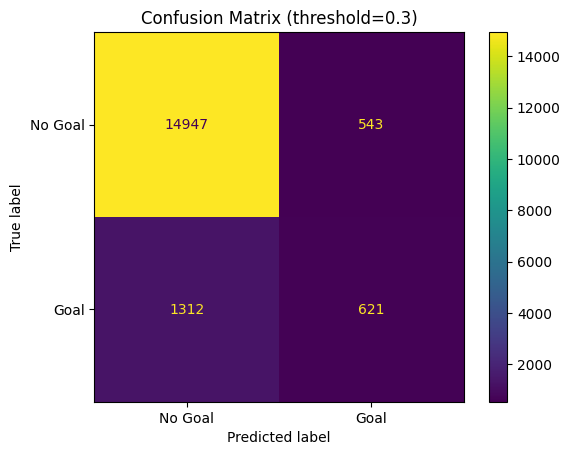

In [36]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Get probabilities
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Try a custom threshold
threshold = 0.3
y_pred_thresh = (y_pred_proba >= threshold).astype(int)

# Metrics at custom threshold
precision = precision_score(y_test, y_pred_thresh)
recall = recall_score(y_test, y_pred_thresh)
f1 = f1_score(y_test, y_pred_thresh)

print(f"Custom threshold {threshold}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")

# Confusion matrix at custom threshold
cm_thresh = confusion_matrix(y_test, y_pred_thresh)
ConfusionMatrixDisplay(cm_thresh, display_labels=["No Goal", "Goal"]).plot(values_format='d')
plt.title(f"Confusion Matrix (threshold={threshold})")
plt.show()


Custom threshold 0.7: Precision=0.409, Recall=0.425, F1=0.417


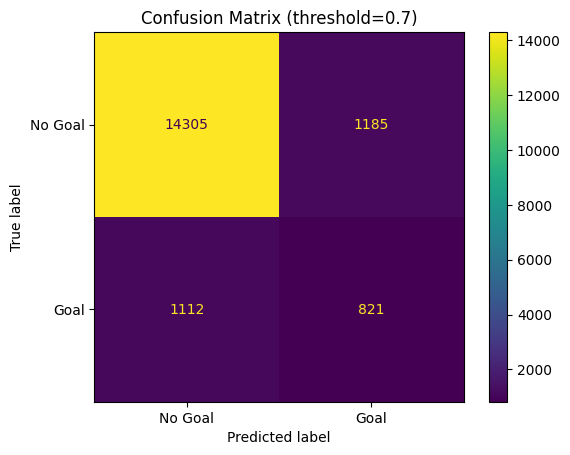

In [43]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Get probabilities
y_pred_proba = pipeline_balanced.predict_proba(X_test)[:, 1]

# Try a custom threshold
threshold = 0.7
y_pred_thresh = (y_pred_proba >= threshold).astype(int)

# Metrics at custom threshold
precision = precision_score(y_test, y_pred_thresh)
recall = recall_score(y_test, y_pred_thresh)
f1 = f1_score(y_test, y_pred_thresh)

print(f"Custom threshold {threshold}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")

# Confusion matrix at custom threshold
cm_thresh = confusion_matrix(y_test, y_pred_thresh)
ConfusionMatrixDisplay(cm_thresh, display_labels=["No Goal", "Goal"]).plot(values_format='d')
plt.title(f"Confusion Matrix (threshold={threshold})")
plt.show()


In [44]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
best_idx = f1s.argmax()
best_threshold = thresholds[best_idx]

print(f"Best threshold by F1: {best_threshold:.3f} (F1={f1s[best_idx]:.3f})")


Best threshold by F1: 0.701 (F1=0.417)


In [46]:
# Get trained logistic regression model
model = pipeline_balanced.named_steps['classifier']

# Get feature names from your ColumnTransformer
# Numerical + categorical
feature_names = numerical_features + categorical_features

# Coefficients from the model
coefs = model.coef_[0]

# Combine into a dataframe
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)


                         Feature  Coefficient
7             technique_name_Lob     1.692191
11          sub_type_name_Corner     1.649068
14       sub_type_name_Open Play    -1.591718
4        technique_name_Backheel    -0.858912
0               distance_to_goal    -0.708473
15         sub_type_name_Penalty     0.535920
2               opponents_in_way    -0.451422
9   technique_name_Overhead Kick    -0.356705
1              angle_to_goal_deg     0.300658
12       sub_type_name_Free Kick     0.241074
5   technique_name_Diving Header     0.124763
8          technique_name_Normal     0.107975
10         technique_name_Volley     0.063247
6     technique_name_Half Volley     0.059707
3               teammates_in_way    -0.012411
13        sub_type_name_Kick Off    -0.002076


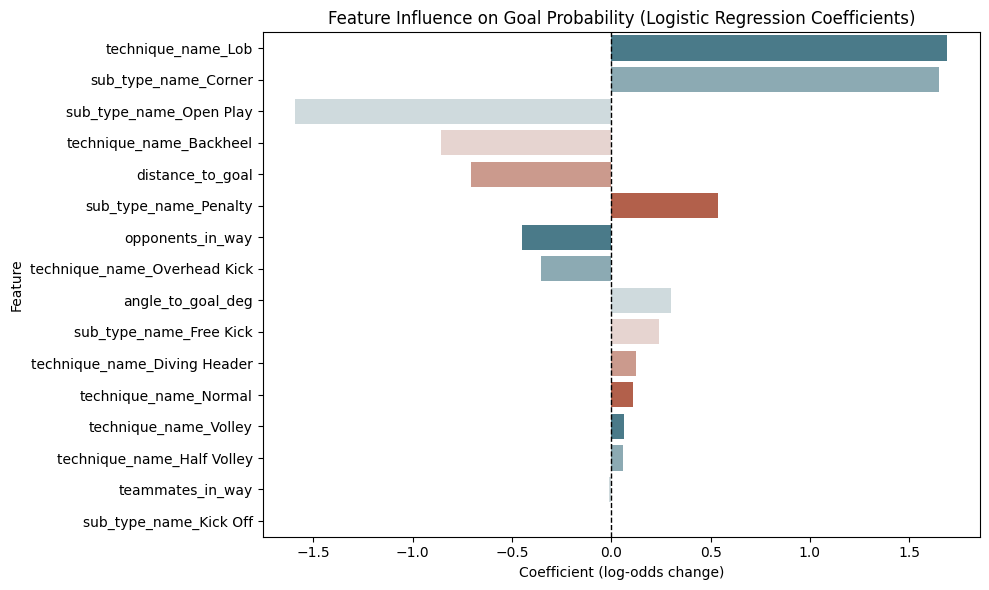

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coef_df,
    palette=sns.diverging_palette(220, 20, as_cmap=False)
)
plt.title("Feature Influence on Goal Probability (Logistic Regression Coefficients)")
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Coefficient (log-odds change)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [48]:
from IPython.display import display

display(coef_df.style
    .background_gradient(subset='Coefficient', cmap='coolwarm')
    .format({'Coefficient': '{:+.3f}'})
    .set_caption("Summary of Feature Influence on Goal Probability"))


,Feature,Coefficient
7,technique_name_Lob,+1.692
11,sub_type_name_Corner,+1.649
14,sub_type_name_Open Play,-1.592
4,technique_name_Backheel,-0.859
0,distance_to_goal,-0.708
15,sub_type_name_Penalty,+0.536
2,opponents_in_way,-0.451
9,technique_name_Overhead Kick,-0.357
1,angle_to_goal_deg,+0.301
12,sub_type_name_Free Kick,+0.241


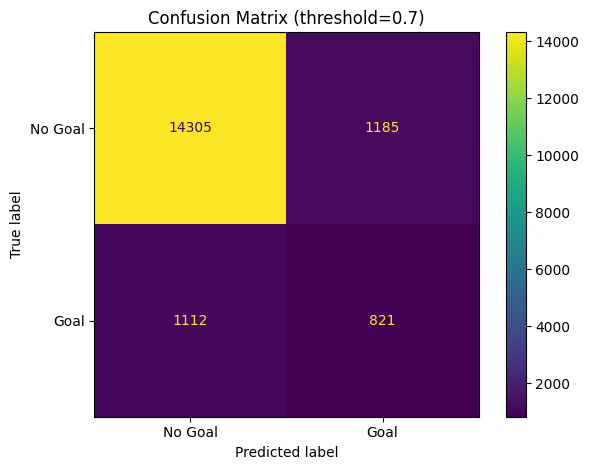

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_thresh)
ConfusionMatrixDisplay(cm, display_labels=["No Goal", "Goal"]).plot(values_format='d')
plt.title(f"Confusion Matrix (threshold={0.7})")
plt.tight_layout()
plt.show()


In [52]:
import numpy as np

# Generate grid points (x: 0-120, y: 0-80, or depending on your pitch dimensions)
x_vals = np.linspace(0, 120, 100)  # pitch length
y_vals = np.linspace(0, 80, 80)    # pitch width

xx, yy = np.meshgrid(x_vals, y_vals)
grid_points = np.column_stack([xx.ravel(), yy.ravel()])


In [53]:
import pandas as pd

# Convert to DataFrame
grid_df = pd.DataFrame(grid_points, columns=['x', 'y'])

# Calculate distance and angle to goal center (x=120, y=40 for right goal)
goal_x, goal_y = 120, 40
grid_df['distance_to_goal'] = np.sqrt((goal_x - grid_df['x'])**2 + (goal_y - grid_df['y'])**2)
grid_df['angle_to_goal_deg'] = np.degrees(np.arctan2(
    7.32 / 2,  # half goal width
    grid_df['distance_to_goal']
))

# Add other required features as needed, e.g., zero opponents/teammates, zeros for one-hot dummies
for col in categorical_features:
    grid_df[col] = 0
grid_df['opponents_in_way'] = 0
grid_df['teammates_in_way'] = 0

# Use only columns your model was trained on
X_grid = grid_df[numerical_features + categorical_features]


In [54]:
# Predict probability of goal
goal_probs = pipeline_balanced.predict_proba(X_grid)[:, 1]


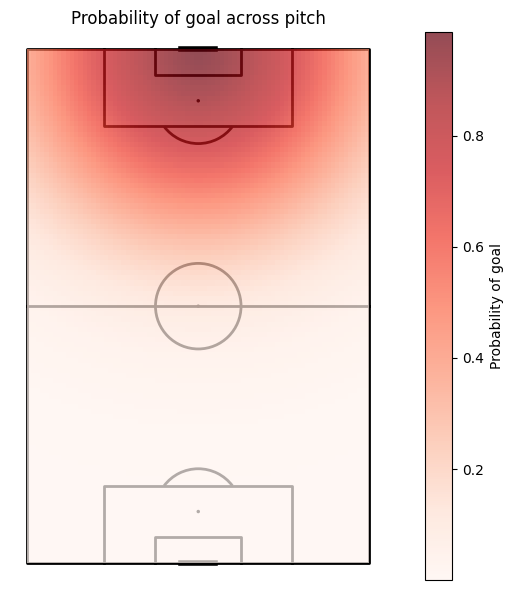

In [57]:
stats = pitch.bin_statistic(
    grid_df['x'],
    grid_df['y'],
    values=goal_probs,
    statistic='mean',
    bins=(100, 80)  # match your grid resolution
)

fig, ax = pitch.draw(figsize=(8, 6))
pcm = pitch.heatmap(stats, ax=ax, cmap='Reds', alpha=0.7)
cbar = fig.colorbar(pcm, ax=ax)
cbar.ax.set_ylabel('Probability of goal')

plt.title("Probability of goal across pitch")
plt.tight_layout()
plt.show()



In [58]:
pip install pymc arviz


In [61]:
import pymc as pm
import numpy as np

X_bayes_df = X_train.copy()
for col in X_bayes_df.columns:
    if X_bayes_df[col].dtype == bool:
        X_bayes_df[col] = X_bayes_df[col].astype(int)


# Make sure X_train and y_train are numpy arrays
X_bayes = X_bayes_df.values.astype(np.float32)  # force numeric type for PyMC compatibility
y_bayes = y_train.values.astype(np.int32)       # target should also be numeric

with pm.Model() as blr:
    # Prior: Gaussian prior over weights (shape: n_features)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=X_bayes.shape[1])

    # Prior: Intercept
    intercept = pm.Normal("intercept", mu=0, sigma=10)

    # Linear combination (log-odds)
    logits = intercept + pm.math.dot(X_bayes, beta)

    # Likelihood: Bernoulli with logistic link
    pm.Bernoulli("obs", logit_p=logits, observed=y_bayes)

    # Sample from the posterior
    trace = pm.sample(draws=2000, tune=1000, target_accept=0.9, cores=2, return_inferencedata=True)


Output()

KeyError: 0